In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import evaluate as ev
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = w.wrangle_zillow(cached=False)

In [3]:
# df = w.wrangle_zillow(cached=True)

In [4]:
df.shape

(71807, 23)

In [5]:
list(df.columns)

['heating_system_type_id',
 'bathrooms',
 'bedrooms',
 'prop_sqft',
 'fips',
 'fireplace_cnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'pool_cnt',
 'region_id_city',
 'year_built',
 'fireplace_flag',
 'struct_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'heating_system_desc',
 'la_cnty',
 'orange_cnty',
 'ventura_cnty',
 'log_error_class']

In [6]:
df.nunique()

heating_system_type_id       10
bathrooms                    20
bedrooms                     11
prop_sqft                  4831
fips                          3
fireplace_cnt                 6
latitude                  59177
longitude                 57542
lot_sqft                  21551
pool_cnt                      2
region_id_city              187
year_built                  133
fireplace_flag                2
struct_tax_value          48096
tax_value                 47952
land_tax_value            49261
tax_amount                68643
log_error                 71309
heating_system_desc          10
la_cnty                       2
orange_cnty                   2
ventura_cnty                  2
log_error_class               2
dtype: int64

In [7]:
df.head(2)

,heating_system_type_id,bathrooms,bedrooms,prop_sqft,fips,fireplace_cnt,latitude,longitude,lot_sqft,pool_cnt,...,struct_tax_value,tax_value,land_tax_value,tax_amount,log_error,heating_system_desc,la_cnty,orange_cnty,ventura_cnty,log_error_class
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2,2.0,3.0,2107.0,6037,0.0,0.342226,-1.186174,9158,1.0,...,249655.0,624139.0,374484.0,7659.36,-0.007357,Central,1,0,0,l1
10711877,2,2.0,4.0,1882.0,6037,0.0,0.342203,-1.186164,9035,1.0,...,253000.0,660000.0,407000.0,8123.91,0.021066,Central,1,0,0,l2


In [8]:
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', 'heating_system_desc', 'region_id_city']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'latitude', 'longitude', 'lot_sqft', 'year_built', 'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

In [9]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [10]:
train, validate, test = w.scale_my_data(train, validate, test, quant_vars)

In [11]:
train.shape, validate.shape, test.shape

((40211, 23), (17234, 23), (14362, 23))

In [12]:
train.head()

,heating_system_type_id,bathrooms,bedrooms,prop_sqft,fips,fireplace_cnt,latitude,longitude,lot_sqft,pool_cnt,...,struct_tax_value,tax_value,land_tax_value,tax_amount,log_error,heating_system_desc,la_cnty,orange_cnty,ventura_cnty,log_error_class
parcelid,,,,,,,,,,,,,,,,,,,,,
14662920,2,0.15,0.222222,0.058192,6059,0.0,0.232076,0.830968,0.000784,0.0,...,0.009672,0.015533,0.012836,0.015527,-0.022805,Central,0,1,0,l1
13037123,2,0.10,0.111111,0.050214,6037,0.0,0.529555,0.841345,0.029413,0.0,...,0.004537,0.003590,0.001891,0.004509,-0.139910,Central,1,0,0,l1
17161318,2,0.00,0.111111,0.048969,6111,0.0,0.586460,0.160352,0.000634,0.0,...,0.003976,0.002311,0.000725,0.002504,-0.232833,Central,0,0,1,l1
11510253,2,0.20,0.222222,0.104855,6037,0.0,0.359986,0.561306,0.001040,0.0,...,0.014957,0.027994,0.024292,0.027207,0.037092,Central,1,0,0,l2
11183554,2,0.20,0.333333,0.119565,6037,0.0,0.871357,0.649146,0.003359,0.0,...,0.024328,0.017663,0.007761,0.021781,0.229414,Central,1,0,0,l2


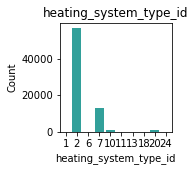

    heating_system_type_id  Count  Percent
2                        2  56766    79.05
7                        7  13220    18.41
24                      20    845     1.18
6                       10    776     1.08
20                       6    101     0.14
13                       1     59     0.08
18                      24     23     0.03
1                       13     13     0.02
10                      18      3     0.00
11                      11      1     0.00
_________________________________________________________________


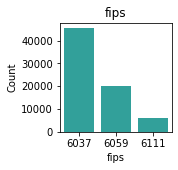

      fips  Count  Percent
6037  6037  45453     63.3
6059  6059  20248     28.2
6111  6111   6106      8.5
_________________________________________________________________


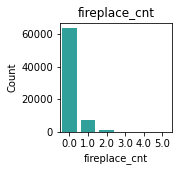

     fireplace_cnt  Count  Percent
0.0            0.0  63397    88.29
1.0            1.0   7155     9.96
2.0            2.0    987     1.37
3.0            3.0    230     0.32
4.0            4.0     35     0.05
5.0            5.0      3     0.00
_________________________________________________________________


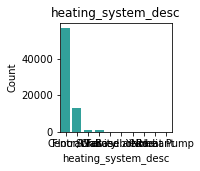

           heating_system_desc  Count  Percent
Central                Central  56766    79.05
Floor/Wall          Floor/Wall  13220    18.41
Yes                      Solar    845     1.18
Forced air             Gravity    776     1.08
Solar               Forced air    101     0.14
None                 Baseboard     59     0.08
Radiant                    Yes     23     0.03
Baseboard                 None     13     0.02
Gravity                Radiant      3     0.00
Heat Pump            Heat Pump      1     0.00
_________________________________________________________________


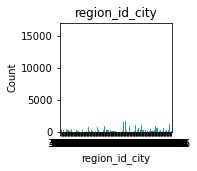

        region_id_city  Count  Percent
12447            12447  16226    22.60
46298           204250   2293     3.19
5534              9840   1858     2.59
52650            38980   1666     2.32
40227            37688   1560     2.17
...                ...    ...      ...
216871           34278      2     0.00
21395            25974      1     0.00
50569            27110      1     0.00
40410            53655      1     0.00
36078            42091      1     0.00

[187 rows x 3 columns]
_________________________________________________________________


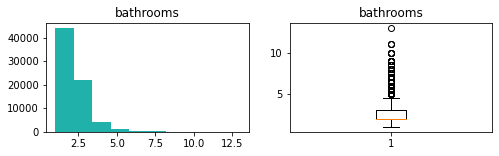

count    71807.000000
mean         2.266527
std          0.941950
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bathrooms, dtype: float64


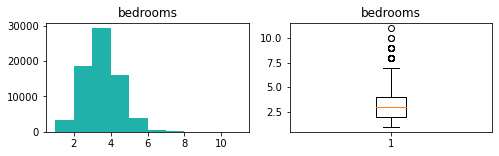

count    71807.000000
mean         3.016558
std          1.001623
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


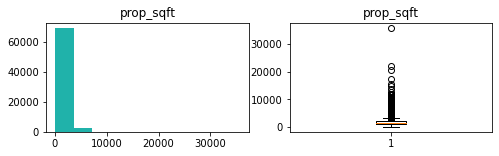

count    71807.000000
mean      1749.092804
std        937.015012
min        128.000000
25%       1163.000000
50%       1510.000000
75%       2061.000000
max      35640.000000
Name: prop_sqft, dtype: float64


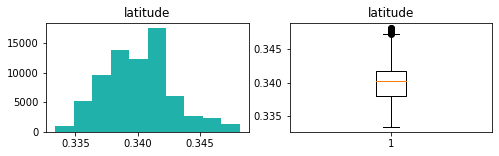

count    71807.000000
mean         0.340057
std          0.002693
min          0.333395
25%          0.338055
50%          0.340194
75%          0.341773
max          0.348188
Name: latitude, dtype: float64


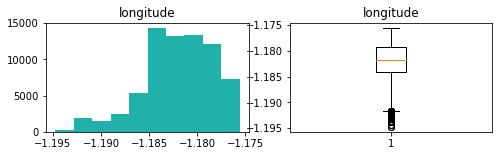

count    71807.000000
mean        -1.181990
std          0.003650
min         -1.194754
25%         -1.184176
50%         -1.181700
75%         -1.179166
max         -1.175546
Name: longitude, dtype: float64


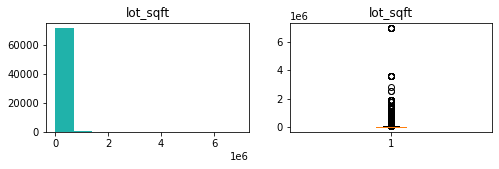

count    7.180700e+04
mean     3.158264e+04
std      1.205227e+05
min      2.360000e+02
25%      5.972000e+03
50%      7.502000e+03
75%      1.500000e+04
max      6.971010e+06
Name: lot_sqft, dtype: float64


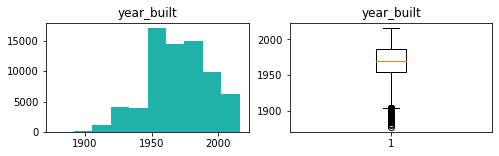

count    71807.000000
mean      1969.335705
std         23.095653
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1987.000000
max       2016.000000
Name: year_built, dtype: float64


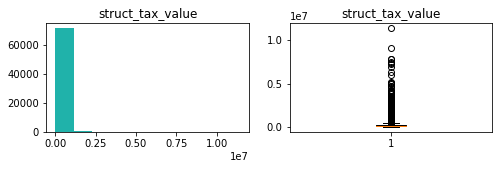

count    7.180700e+04
mean     1.878131e+05
std      2.304348e+05
min      4.400000e+01
25%      8.339500e+04
50%      1.348250e+05
75%      2.160200e+05
max      1.142179e+07
Name: struct_tax_value, dtype: float64


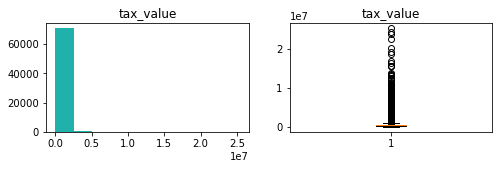

count    7.180700e+04
mean     4.870104e+05
std      6.314480e+05
min      3.254000e+03
25%      2.043005e+05
50%      3.556480e+05
75%      5.658790e+05
max      2.538125e+07
Name: tax_value, dtype: float64


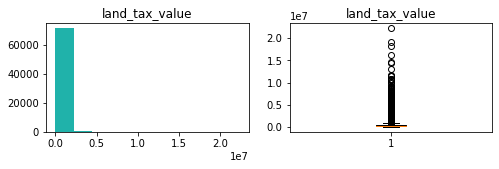

count    7.180700e+04
mean     2.991973e+05
std      4.585366e+05
min      1.610000e+02
25%      8.342650e+04
50%      2.030500e+05
75%      3.665455e+05
max      2.233550e+07
Name: land_tax_value, dtype: float64


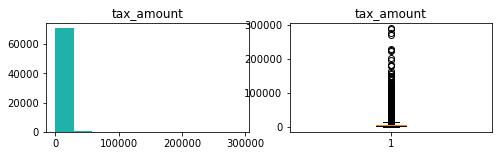

count     71807.000000
mean       5935.852753
std        7337.075191
min          19.920000
25%        2679.230000
50%        4396.560000
75%        6835.180000
max      290998.060000
Name: tax_amount, dtype: float64


In [13]:
ex.explore_univariate(df, categorical_vars, quant_vars)

- Features with a lot of outliers:
    - bathrooms, prop_sqft, lot_sqft, struct_tax_value, tax_value, land_tax_value, tax_amount, and log_error
- Bedrooms appear to be normally distributed
- Lat and long are good indicators of population density by location, also I shouldn't of Scaled lat and long.


pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=144216272.0, pvalue=1.4587980578633046e-06)
       chi2  p-value  degrees of freedom
0  9.076028  0.00259                   1

expected:
               0             1
0  15641.998234  15649.001766
1   4459.001766   4460.998234

_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=81753339.5, pvalue=0.06569119205813939)
       chi2   p-value  degrees of freedom
0  1.585022  0.208039                   1

expected:
               0             1
0  17762.023625  17769.976375
1   2338.976375   2340.023625

_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=191423097.0, pvalue=0.0010887104450828047)
       chi2  p-value  degrees of freedom
0  0.448244  0.50317                   1

expected:
               0             1
0   7371.849668   7375.150332

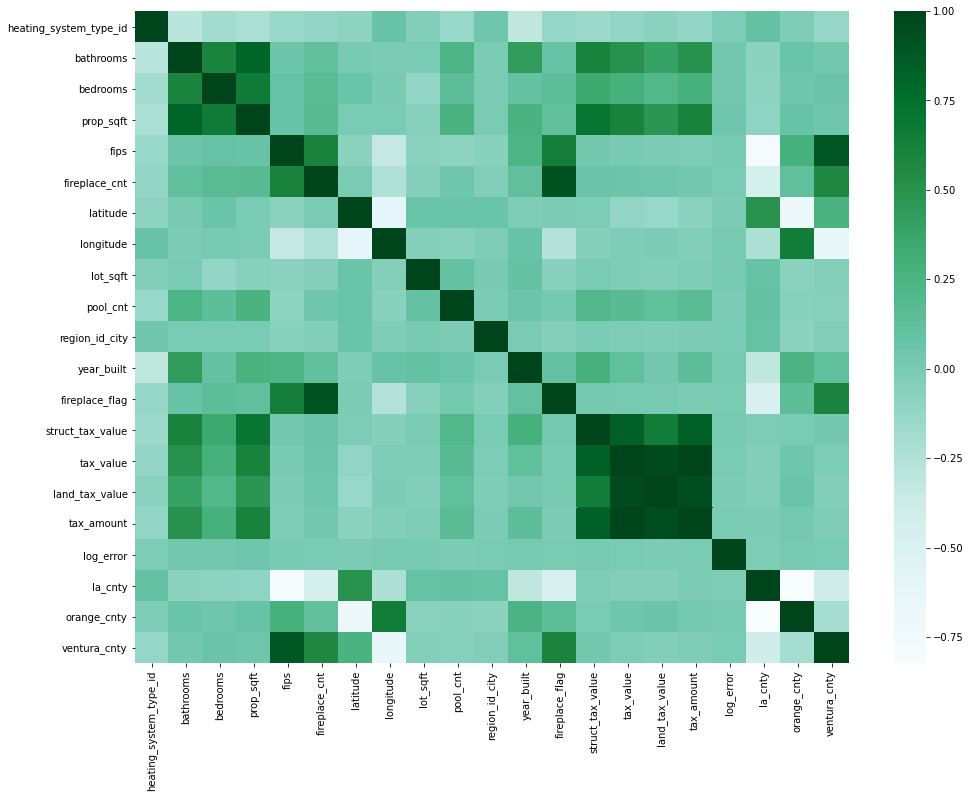

bathrooms 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.060324435185352056, pvalue=9.660283467070435e-34)

____________________
____________________

bedrooms 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.05100683679345571, pvalue=1.3879321789990895e-24)

____________________
____________________

prop_sqft 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.06657053611822937, pvalue=9.869148786368588e-41)

____________________
____________________

latitude 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=-0.01345912985646265, pvalue=0.006955765241747317)

____________________
____________________

longitude 
____________________

Spearman's Correlation Test:

SpearmanrResult(correlation=0.006481248990425043, pvalue=0.19372527266137035)

____________________
____________________

lot_sqft 
____________________

Spearman's Correlation Test:

Spearmanr

In [14]:
ex.run_stats_on_everything(train, categorical_target, continuous_target, binary_vars, quant_vars)

pool_cnt 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=144216272.0, pvalue=1.4587980578633046e-06)
       chi2  p-value  degrees of freedom
0  9.076028  0.00259                   1

expected:
               0             1
0  15641.998234  15649.001766
1   4459.001766   4460.998234


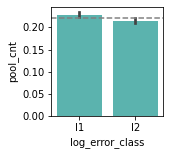


_____________________

fireplace_flag 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=81753339.5, pvalue=0.06569119205813939)
       chi2   p-value  degrees of freedom
0  1.585022  0.208039                   1

expected:
               0             1
0  17762.023625  17769.976375
1   2338.976375   2340.023625


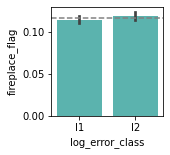


_____________________

la_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=191423097.0, pvalue=0.0010887104450828047)
       chi2  p-value  degrees of freedom
0  0.448244  0.50317                   1

expected:
               0             1
0   7371.849668   7375.150332
1  12729.150332  12734.849668


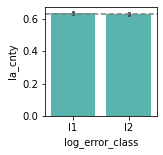


_____________________

orange_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=161133640.0, pvalue=0.013686459205633491)
       chi2   p-value  degrees of freedom
0  0.542454  0.461417                   1

expected:
              0            1
0  14431.26928  14437.73072
1   5669.73072   5672.26928


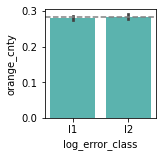


_____________________

ventura_cnty 
_____________________


Mann Whitney Test Comparing Means:  MannwhitneyuResult(statistic=61580381.0, pvalue=0.09504199071965944)
       chi2   p-value  degrees of freedom
0  0.000186  0.989108                   1

expected:
               0             1
0  18398.881052  18407.118948
1   1702.118948   1702.881052


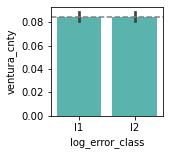


_____________________

bathrooms 
____________________



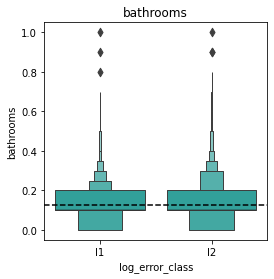

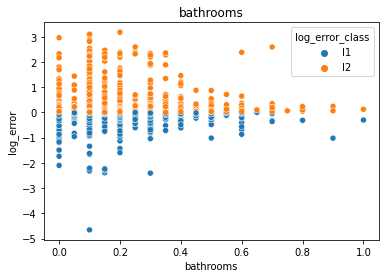

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.121076      0.132869
std                  0.088037      0.099213
min                  0.000000      0.000000
25%                  0.100000      0.100000
50%                  0.100000      0.100000
75%                  0.200000      0.200000
max                  1.000000      1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.060324435185352056, pvalue=9.660283467070435e-34)

____________________

bedrooms 
____________________



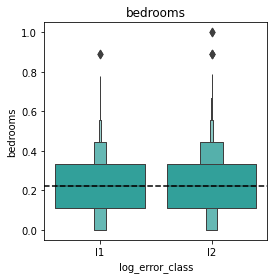

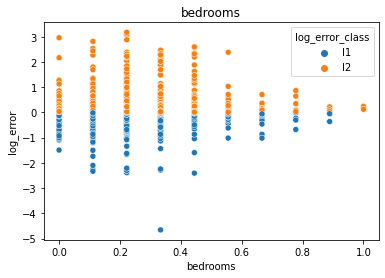

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.218745      0.229178
std                  0.107696      0.115104
min                  0.000000      0.000000
25%                  0.111111      0.111111
50%                  0.222222      0.222222
75%                  0.333333      0.333333
max                  0.888889      1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.05100683679345571, pvalue=1.3879321789990895e-24)

____________________

prop_sqft 
____________________



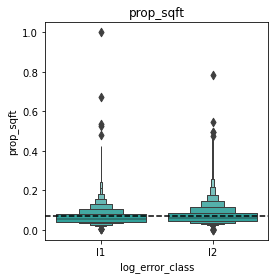

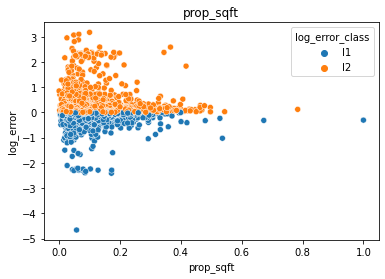

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.066473      0.072463
std                  0.038919      0.045868
min                  0.002674      0.000000
25%                  0.041684      0.043482
50%                  0.056716      0.060313
75%                  0.080232      0.087979
max                  1.000000      0.784018 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06657053611822937, pvalue=9.869148786368588e-41)

____________________

latitude 
____________________



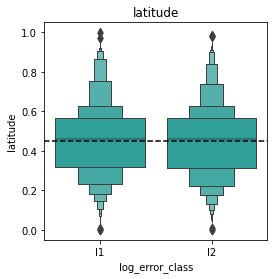

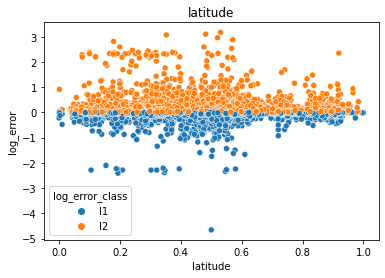

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.453033      0.447457
std                  0.183209      0.181063
min                  0.000000      0.000715
25%                  0.318330      0.311611
50%                  0.458406      0.461665
75%                  0.568212      0.564745
max                  1.000000      0.984480 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.01345912985646265, pvalue=0.006955765241747317)

____________________

longitude 
____________________



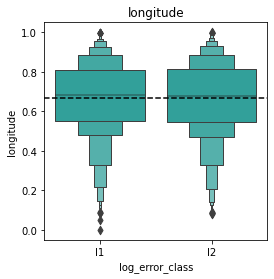

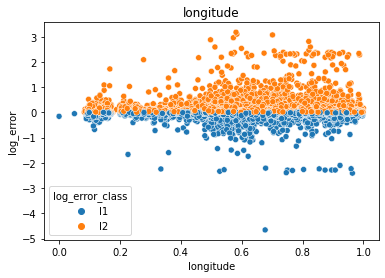

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.665959      0.665153
std                  0.188373      0.192147
min                  0.000000      0.082884
25%                  0.553935      0.548936
50%                  0.681430      0.678543
75%                  0.808792      0.816710
max                  0.998869      1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.006481248990425043, pvalue=0.19372527266137035)

____________________

lot_sqft 
____________________



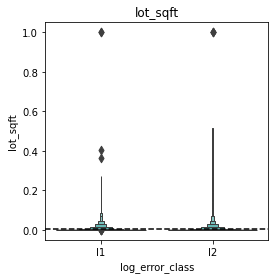

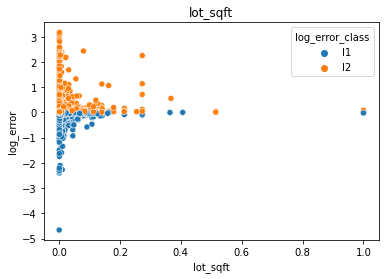

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.004420      0.004529
std                  0.016260      0.019199
min                  0.000000      0.000029
25%                  0.000822      0.000823
50%                  0.001042      0.001048
75%                  0.002071      0.002142
max                  1.000000      1.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.003933556260709749, pvalue=0.4302511205092002)

____________________

year_built 
____________________



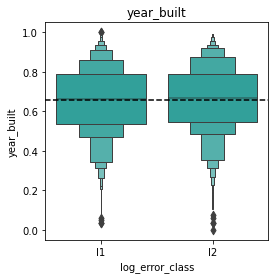

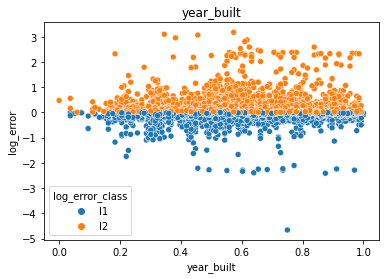

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.653636      0.659503
std                  0.170241      0.170331
min                  0.036765      0.000000
25%                  0.536765      0.544118
50%                  0.661765      0.669118
75%                  0.786765      0.786765
max                  1.000000      0.992647 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.03039025637546708, pvalue=1.0924651194476797e-09)

____________________

struct_tax_value 
____________________



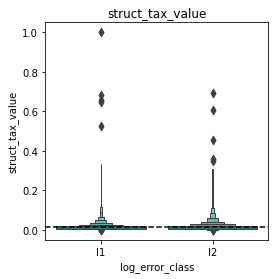

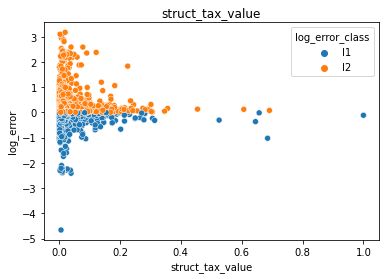

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.015710      0.017234
std                  0.019386      0.021068
min                  0.000182      0.000000
25%                  0.007244      0.007325
50%                  0.011660      0.012017
75%                  0.018410      0.019705
max                  1.000000      0.691094 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.025547895594883203, pvalue=2.9957390055276866e-07)

____________________

tax_value 
____________________



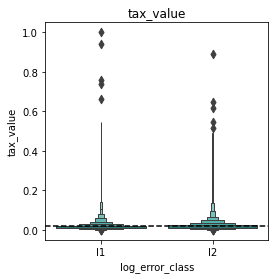

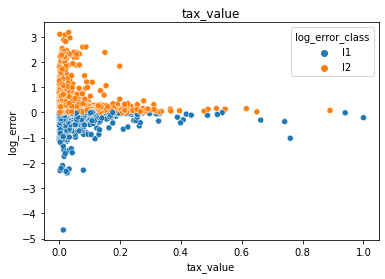

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.018302      0.019867
std                  0.024373      0.026078
min                  0.000392      0.000000
25%                  0.007950      0.007849
50%                  0.013752      0.014061
75%                  0.021586      0.022926
max                  1.000000      0.889986 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.016747913297282355, pvalue=0.0007835631752135003)

____________________

land_tax_value 
____________________



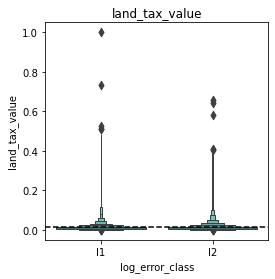

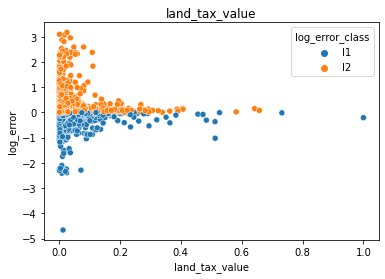

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.012894      0.013893
std                  0.020303      0.021278
min                  0.000047      0.000000
25%                  0.003756      0.003689
50%                  0.009084      0.009164
75%                  0.015956      0.016741
max                  1.000000      0.657952 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.009119890392001784, pvalue=0.06743501972412086)

____________________

tax_amount 
____________________



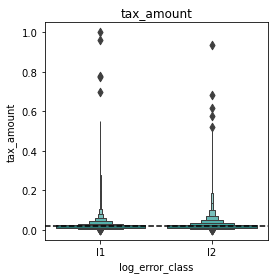

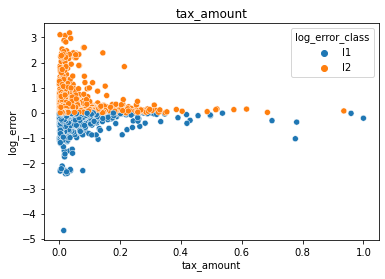

log_error_class            l1            l2
count            20101.000000  20110.000000
mean                 0.019642      0.021194
std                  0.024877      0.026542
min                  0.000000      0.000117
25%                  0.009191      0.008975
50%                  0.014889      0.015203
75%                  0.022886      0.024483
max                  1.000000      0.935561 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.014988637526891477, pvalue=0.002649711459530368)

____________________



In [15]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

In [16]:
list(df.columns)

['heating_system_type_id',
 'bathrooms',
 'bedrooms',
 'prop_sqft',
 'fips',
 'fireplace_cnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'pool_cnt',
 'region_id_city',
 'year_built',
 'fireplace_flag',
 'struct_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'heating_system_desc',
 'la_cnty',
 'orange_cnty',
 'ventura_cnty',
 'log_error_class']

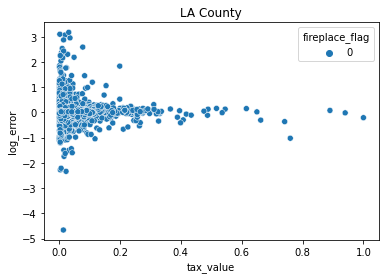

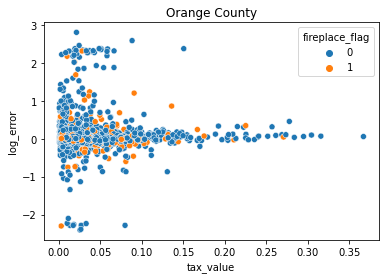

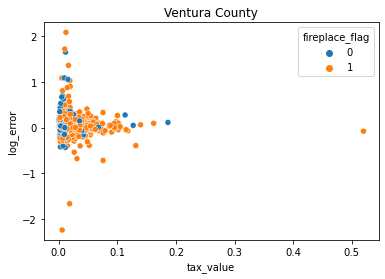

In [17]:
sns.scatterplot(data=train[train.la_cnty == 1], y=continuous_target, x='tax_value', hue='fireplace_flag')
plt.title('LA County')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='tax_value', hue='fireplace_flag')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='tax_value', hue='fireplace_flag')
plt.title('Ventura County')
plt.show()

### Takeaway 
No fireplace_flag in LA county, few in Orange County, and a lot in Ventura County

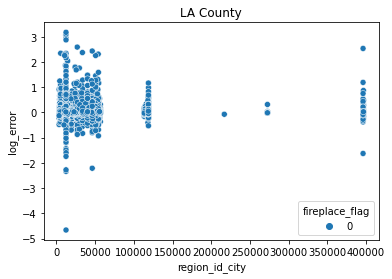

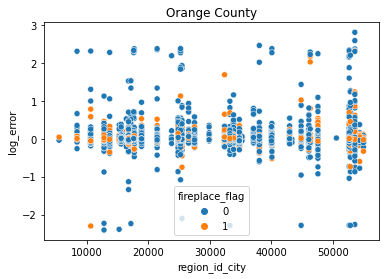

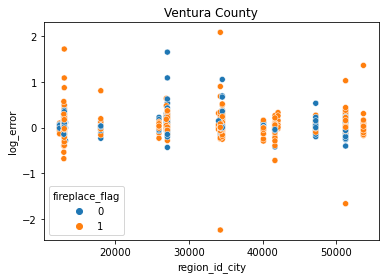

In [18]:
sns.scatterplot(data=train[train.la_cnty == 1], y=continuous_target, x='region_id_city', hue='fireplace_flag')
plt.title('LA County')
plt.show()
sns.scatterplot(data=train[train.orange_cnty == 1], y=continuous_target, x='region_id_city', hue='fireplace_flag')
plt.title("Orange County")
plt.show()
sns.scatterplot(data=train[train.ventura_cnty == 1], y=continuous_target, x='region_id_city', hue='fireplace_flag')
plt.title('Ventura County')
plt.show()